In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

In [2]:
df = pd.read_stata("Labour2.dta")
df.drop(columns="obs", inplace=True)
df.head()

,capital,labour,output,wage
0,2.607,184,9.251,43.080299
1,1.323,91,3.664,27.780001
2,22.094,426,28.782,44.467701
3,10.738,72,4.125,39.734699
4,1.161,46,2.890,34.650700


In [3]:
# specify list of columns with outliers
columns = list(df.columns)

# create empty dictionary with columns as keys
def quar_dict(columns):  # takes as input list of column names
    quartiles = {}
    for column in columns:
        quartiles[column] = None
    return quartiles

# create empty dictionary with columns as keys by list comprehension
def quar_dict2(columns):  # takes as input list of column's names
    quartiles = {column: None for column in columns}
    return quartiles

# fill empty dictionary with percentiles
def percentiles(empty_dict, columns, percentiles=[1, 99]):
# takes empty_dictionary with column names as keys, columns as a list of column's names
# more than 2 percentiles could be specified
    for column in columns:
        a = list(np.percentile(df[column], percentiles))
        empty_dict[column] = a
    return empty_dict


# Subset data: Remove outliers for specified columns
def remove_out(df, dict_out):
    df1 = df
    for column in list(dict.keys(dict_out)):  # Expected that in given dict_out keys = column names
        mask_area = df1[column].between(dict_out[column][0], dict_out[column][1])  
        # Boolean series whether or not value between given percentiles (values in dict_out) fit
        df1 = df1[mask_area]  # Masks applied one by one
    print(f"Number of lost rows {len(df.index) - len(df1.index)}") # How many rows've been lost
    return df1


In [4]:
# invoke percentile functions
percentile = percentiles(quar_dict2(columns), list(df.columns), percentiles=[0, 98])
pd.DataFrame(percentile)

,capital,labour,output,wage
0,0.002000,1.00,0.026000,11.733700
1,61.880561,1260.04,92.505682,73.772687


In [5]:
# invoke trim function
df1 = remove_out(df, percentile)

Number of lost rows 26


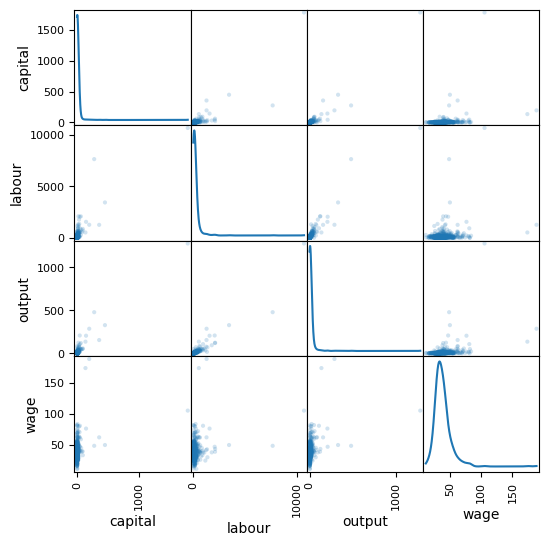

In [6]:
#  original dataset
scatter_matrix(df, alpha=0.2, figsize=(6, 6), diagonal="kde");

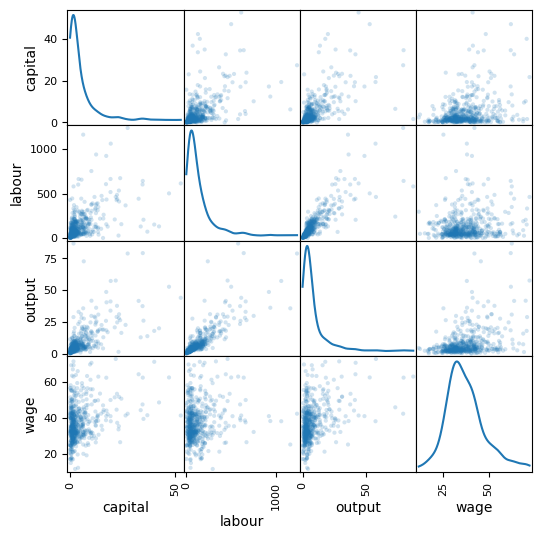

In [7]:
#  trimmed dataset
scatter_matrix(df1, alpha=0.2, figsize=(6, 6), diagonal="kde");